<h1 align='center'> Football Transfer Market Data Analysis <h1>


Explore the fascinating world of football data in this concise notebook. Based on the 'Football Data from Transfermarkt Football (Soccer) data' from Kaggle, this project dives into insights gleaned from the Transfermarkt website.

Created by Rodrigo Rubio in July 2023, this notebook focuses on unraveling sports data in team sports, specifically football. 

If you find this notebook valuable, please upvote and feel free to provide feedback on the visualizations and suggest improvements. Check out the credits below for other helpful resources.



In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

print("Packages installed")

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed
Packages installed


# Get Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'
}

page_urls = [
    #Argentinos Juniors
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2021",
   
    # Arsenal
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2008/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2009/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2010/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2011/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2012/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2013/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2014/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2015/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2016/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2017/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2018/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2019/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2020/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2021/plus/1",
     
     #Banfield
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2021",


     #Boca
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2021",

    # Colón
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2021",

    # Estudiantes de La Plata
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2021",

    # Gimnasia y Esgrima La Plata
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2021",

    # Godoy Cruz
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2021",


    # Huracán
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2021",

    # Independiente
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2021",

    # Lanús
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2021",

    # Newell's Old Boys
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2021",

     # Racing Club
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2021",

    # Rosario Central
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2021",

    # River Plate
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2021",

      #San Lorenzo
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2007",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2008",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2009",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2010",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2011",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2012",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2013",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2014",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2015",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2016",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2017",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2018",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2019",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2020",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2021",
    
    #Tigre
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2021",

    #Velez
   "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2021",
]


players_list = []
position_list = []
birthdate_list = []
height_list = []
footed_list = []
signed_list = []
previous_team_list = []
market_value_list = []
season_list = []

for i, url in enumerate(page_urls):
    pageTree = requests.get(url, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    players_data = pageSoup.find_all("tr", {"class": ["odd", "even"]})

    for player in players_data:
        player_info = player.find_all("td")
        player_name = player_info[3].text.strip()
        position = player_info[4].text.strip()
        age = player_info[5].text.strip().split()[1] 
        height = player_info[8].text.strip()
        footed = player_info[9].text.strip()
        signed = player_info[10].text.strip()
        previous_team = player_info[11].find("img")["title"] if player_info[11].find("img") else ""
        market_value = player_info[13].text.strip()
        players_list.append(player_name)
        position_list.append(position)
        birthdate_list.append(age)
        height_list.append(height)
        footed_list.append(footed)
        signed_list.append(signed)
        previous_team_list.append(previous_team)
        market_value_list.append(market_value)
        season_list.append(i + 1)

df = pd.DataFrame({
    "Jugadores": players_list,
    "Posicion": position_list,
    "Fecha de nacimiento": birthdate_list,
    "Altura": height_list,
    "Pie": footed_list,
    "Fichado": signed_list,
    "Equipo Anterior": previous_team_list,
    "Valor de mercado": market_value_list,
    "Temporada": season_list
})



clubes = ["Argentinos Juniors"] * 15 + ["Arsenal"] * 15 + ["Banfield"] * 15 + ["Boca"] * 15 + ["Colon"] * 15 + ["Estudiantes de La Plata"] * 15 + ["Gimnasia y Esgrima La Plata"] * 15 + ["Godoy Cruz Antonio Tomba"] * 15 + ["Independiente"] * 15 + ["Lanus"] * 15 + ["Newell's Old Boys"] * 15 + ["Rosario Central"] * 15  + ["Racing Club"] * 15 + ["River Plate"] * 15 + ["San Lorenzo"] * 15 + ["Tigre"] * 15 + ["Velez Sarsfield"] * 15 

# Repetir los nombres de clubes para cada jugador en cada temporada
clubes = clubes * (len(df) // len(clubes)) + clubes[:len(df) % len(clubes)]



# Agregar la columna "Club" al DataFrame
df["Club"] = clubes

# Guardar los datos en el archivo CSV
df.to_csv('futbolargentino.csv', index=False)

**Transformed Data**

I transformed the data into an Excel file for analysis and visualization.

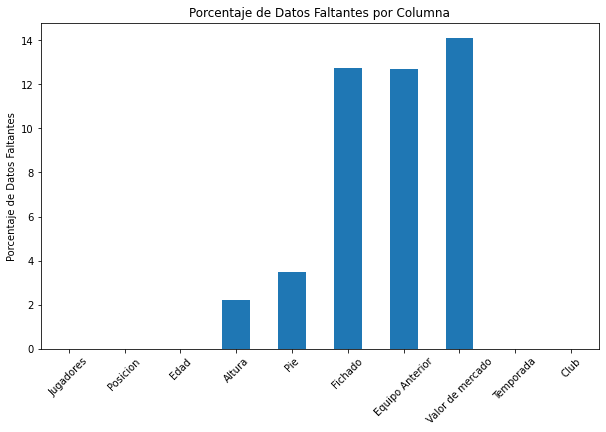

In [3]:
# Leer el archivo Excel
df = pd.read_excel("futbolargentino.xlsx")

# Obtener el porcentaje de datos faltantes
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind="bar")
plt.title("Porcentaje de Datos Faltantes por Columna")
plt.ylabel("Porcentaje de Datos Faltantes")
plt.xticks(rotation=45)
plt.show()


In [4]:
# Convertir la columna "Edad" a valores numéricos
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")

In [5]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

In [6]:

# Resetear el índice después del filtrado
df = df.reset_index(drop=True)

# Calcular la tabla de segregación por posición
seg_table = pd.crosstab(df["Posicion"], columns="Count")

# Mostrar la tabla de segregación
print(seg_table)

col_0                 Count
Posicion                   
Centrocampista           33
Defensa                   6
Defensa central        1612
Delantero                20
Delantero centro       1444
Extremo derecho         450
Extremo izquierdo       455
Interior derecho        208
Interior izquierdo      184
Lateral derecho         603
Lateral izquierdo       627
Mediapunta               55
Mediocentro             870
Mediocentro ofensivo    812
Pivote                  805
Portero                 705


In [7]:

# Eliminar filas con valores 'nan' en la columna "Posicion"
df = df.dropna(subset=["Posicion"])

# Resetear el índice después del filtrado
df = df.reset_index(drop=True)

# Diccionario para mapear las posiciones a las categorías deseadas
posiciones_actualizadas = {
    'Portero': 'Portero',
    'Defensa central': 'Defensor',
    'Lateral izquierdo': 'Defensor',
    'Lateral derecho': 'Defensor',
    'Centrocampista': 'Mediocampista',
    'Pivote': 'Mediocampista',
    'Mediocentro': 'Mediocampista',
    'Interior derecho': 'Mediocampista',
    'Interior izquierdo': 'Mediocampista',
    'Delantero': 'Atacante',
    'Delantero centro': 'Atacante',
    'Extremo derecho': 'Atacante',
    'Extremo izquierdo': 'Atacante',
    'Mediapunta': 'Atacante',
    'Mediocentro ofensivo': 'Atacante'
}

# Crear la nueva columna "Posiciones Actualizada"
df['Posiciones Actualizada'] = df['Posicion'].map(posiciones_actualizadas)

# Calcular la tabla de segregación por posición
seg_table = pd.crosstab(df["Posiciones Actualizada"], columns="Count")

# Mostrar la tabla de segregación
print(seg_table)

col_0                   Count
Posiciones Actualizada       
Atacante                 3236
Defensor                 2842
Mediocampista            2100
Portero                   705


In [8]:
# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
df_unique_jugadores = df.drop_duplicates(subset="Jugadores", keep="last")

# Filtrar los jugadores de la posición "Atacante" en el DataFrame con jugadores únicos
jugadores_atacantes = df_unique_jugadores[df_unique_jugadores["Posiciones Actualizada"] == "Atacante"]

# Ordenar los jugadores por valor de mercado de manera descendente
jugadores_atacantes_mas_caros = jugadores_atacantes.sort_values(by="Valor de mercado", ascending=False)

# Seleccionar los 10 jugadores más caros
jugadores_atacantes_top_10 = jugadores_atacantes_mas_caros.head(10)

# Mostrar la tabla con los 10 jugadores más caros de la posición "Atacante"
print(jugadores_atacantes_top_10)

             Jugadores              Posicion  Edad  Altura        Pie     Fichado                      Equipo Anterior  Valor de mercado  Temporada             Club Posiciones Actualizada
6258  Lautaro Martínez      Delantero centro  20.0    1.74    derecho  01/01/2016               Racing Club Inferiores        25000000.0       2018           Racing               Atacante
7441    Julián Álvarez      Delantero centro  22.0    1.70    derecho  01/02/2022                      Manchester City        23000000.0       2022      River Plate               Atacante
8853     Thiago Almada  Mediocentro ofensivo  21.0    1.71    derecho  01/07/2018                                Libre        20000000.0       2021  Velez Sarsfield               Atacante
7297      Lucas Alario      Delantero centro  23.0    1.85    derecho  01/07/2015                                Libre        20000000.0       2018      River Plate               Atacante
7407      Rafael Borré      Delantero centro  33.0    1.74  

In [9]:
# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
df_unique_jugadores = df.drop_duplicates(subset="Jugadores", keep="last")

# Lista de posiciones actualizadas a considerar
posiciones_a_considerar = ["Portero", "Mediocampista", "Defensor", "Atacante"]

# Lista para almacenar los DataFrames de los 10 jugadores más caros de cada posición
top_10_jugadores_por_posicion = []

# Iteramos sobre las posiciones a considerar y filtramos los 10 jugadores más caros de cada una
for posicion in posiciones_a_considerar:
    jugadores_posicion = df_unique_jugadores[df_unique_jugadores["Posiciones Actualizada"] == posicion]
    jugadores_posicion_mas_caros = jugadores_posicion.sort_values(by="Valor de mercado", ascending=False).head(10)
    top_10_jugadores_por_posicion.append(jugadores_posicion_mas_caros)

# Concatenamos los DataFrames en una única tabla
tabla_top_10_jugadores = pd.concat(top_10_jugadores_por_posicion)

# Mostrar la tabla con los 10 jugadores más caros de cada posición
print(tabla_top_10_jugadores)

                  Jugadores              Posicion  Edad  Altura          Pie     Fichado                       Equipo Anterior  Valor de mercado  Temporada                     Club Posiciones Actualizada
7447         Sebastián Saja               Portero  21.0    1.90  ambidiestro  09/07/2005                            Córdoba CF         4500000.0       2008              San Lorenzo                Portero
7414          Franco Armani               Portero  24.0    1.89      derecho  03/01/2018                     Atlético Nacional         3500000.0       2022              River Plate                Portero
6387          Gabriel Arias               Portero  31.0    1.89      derecho  03/07/2018                CSD Defensa y Justicia         3200000.0       2022                   Racing                Portero
4325           Lucas Chaves               Portero  21.0    1.82      derecho  01/06/2022                    Argentinos Juniors         3000000.0       2022                  Huracan    

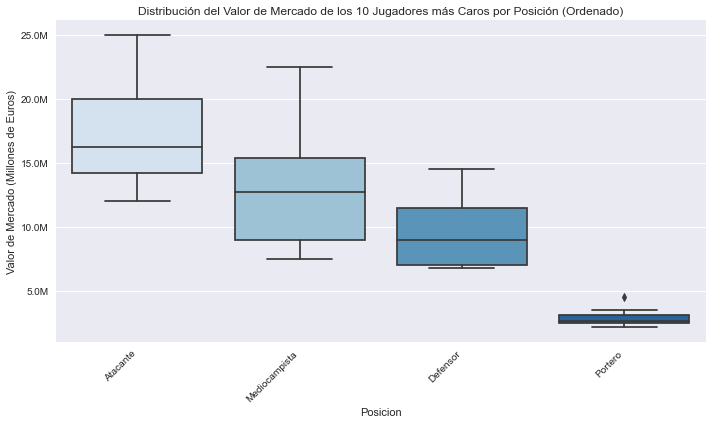

In [10]:

# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
df_unique_jugadores = df.drop_duplicates(subset="Jugadores", keep="last")

# Lista de posiciones actualizadas a considerar
posiciones_a_considerar = ["Atacante", "Mediocampista", "Defensor", "Portero"]

# Lista para almacenar los DataFrames de los 10 jugadores más caros de cada posición
top_10_jugadores_por_posicion = []

# Iteramos sobre las posiciones a considerar y filtramos los 10 jugadores más caros de cada una
for posicion in posiciones_a_considerar:
    jugadores_posicion = df_unique_jugadores[df_unique_jugadores["Posiciones Actualizada"] == posicion]
    jugadores_posicion_mas_caros = jugadores_posicion.sort_values(by="Valor de mercado", ascending=False).head(10)
    top_10_jugadores_por_posicion.append(jugadores_posicion_mas_caros)

# Concatenamos los DataFrames en una única tabla
tabla_top_10_jugadores = pd.concat(top_10_jugadores_por_posicion)

# Agregar una columna para codificar el orden deseado de las posiciones
orden_posiciones = {"Atacante": 1, "Mediocampista": 2, "Defensor": 3, "Portero": 4}
tabla_top_10_jugadores["Orden Posiciones"] = tabla_top_10_jugadores["Posiciones Actualizada"].map(orden_posiciones)

# Ordenar el DataFrame según la columna de orden de posiciones
tabla_top_10_jugadores = tabla_top_10_jugadores.sort_values(by="Orden Posiciones")

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=tabla_top_10_jugadores, x="Posiciones Actualizada", y="Valor de mercado", palette="Blues", order=posiciones_a_considerar)

# Formatear el eje Y para mostrar los valores en millones y sin notación exponencial
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Etiquetas del eje X inclinadas a 45 grados
plt.xticks(rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Posicion")
plt.ylabel("Valor de Mercado (Millones de Euros)")
plt.title("Distribución del Valor de Mercado de los 10 Jugadores más Caros por Posición (Ordenado)")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In brief, this code snippet imports the pandas and matplotlib.pyplot libraries, reads data from an Excel file into a DataFrame, calculates the percentage of missing data in each column, and visualizes it using a bar plot. The plot shows the percentage of missing data for each column on the y-axis and the column names on the x-axis, with rotated labels for better readability.


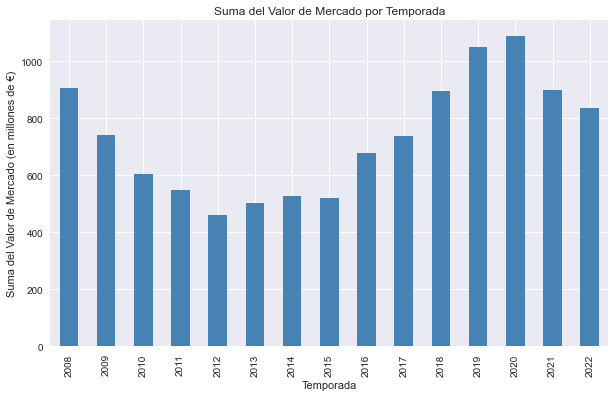

In [11]:


# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
market_value_sum.plot(kind="bar", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_xlabel("Temporada")
ax.set_ylabel("Suma del Valor de Mercado (en millones de €)")
ax.set_title("Suma del Valor de Mercado por Temporada")

# Ajustar el formato del eje Y para mostrar los valores en millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}"))

# Mostrar el gráfico
plt.show()

Valor promedio de un jugador

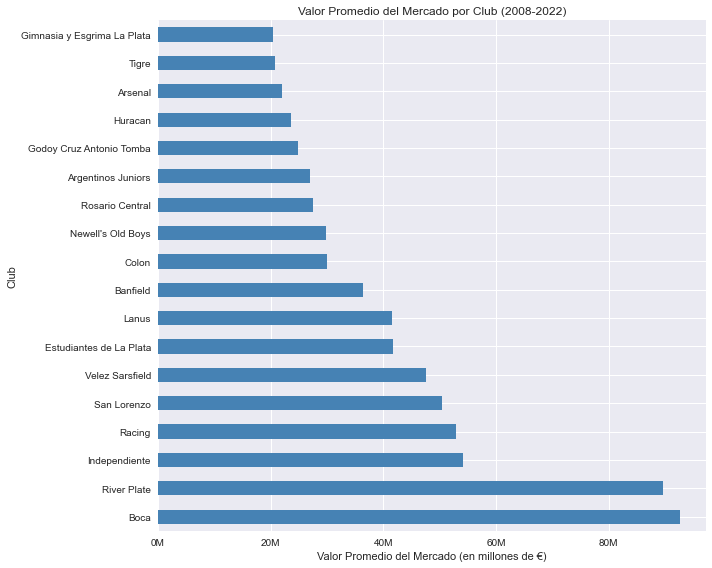

In [13]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = df[df["Valor de mercado"] > 100000]

# Calcular el valor total del mercado por "Club" y "Temporada"
valor_total_mercado = filtered_df.groupby(["Club", "Temporada"])["Valor de mercado"].sum().unstack()

# Calcular el valor promedio del mercado por "Club" en todas las temporadas
valor_promedio_general = valor_total_mercado.mean(axis=1).sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 8))
valor_promedio_general.plot(kind="barh", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_ylabel("Club")
ax.set_xlabel("Valor Promedio del Mercado (en millones de €)")
ax.set_title("Valor Promedio del Mercado por Club (2008-2022)")

# Ajustar el formato del eje X para mostrar los valores en millones
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

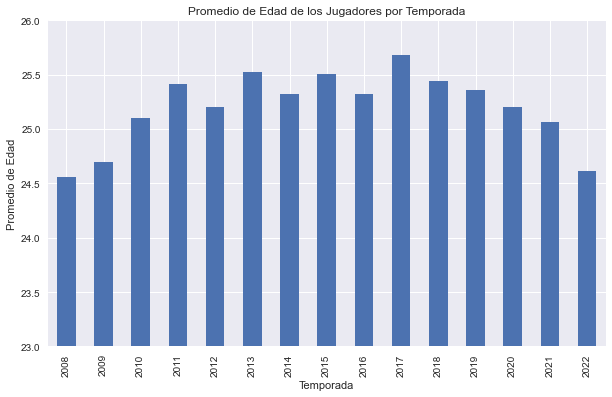

In [16]:
# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

# Calcular los promedios de edad por temporada
promedios_edad = df.groupby("Temporada")["Edad"].mean()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
promedios_edad.plot(kind="bar", ax=ax)
ax.set_xlabel("Temporada")
ax.set_ylabel("Promedio de Edad")
ax.set_title("Promedio de Edad de los Jugadores por Temporada")

# Establecer límites del eje Y
ax.set_ylim(23, 26)

plt.show()

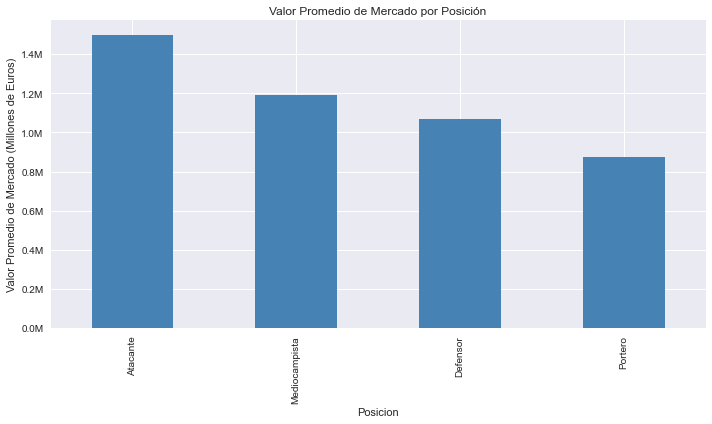

In [15]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

# Crear la nueva columna "Posiciones Actualizada"
df['Posiciones Actualizada'] = df['Posicion'].map(posiciones_actualizadas)

# Calcular el valor promedio por posición actualizada
valor_promedio_por_posicion = df.groupby('Posiciones Actualizada')['Valor de mercado'].mean().sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras 
plt.figure(figsize=(10, 6))
valor_promedio_por_posicion.plot(kind='bar', color='steelblue')

# Formatear el eje Y para mostrar los valores en millones y sin notación exponencial
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Posicion")
plt.ylabel("Valor Promedio de Mercado (Millones de Euros)")
plt.title("Valor Promedio de Mercado por Posición")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Process Data

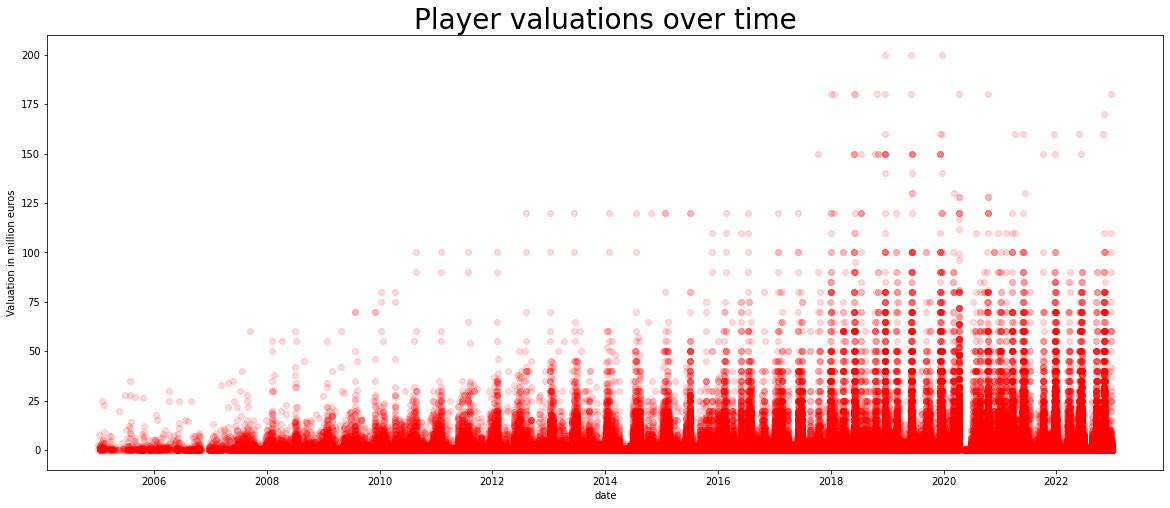

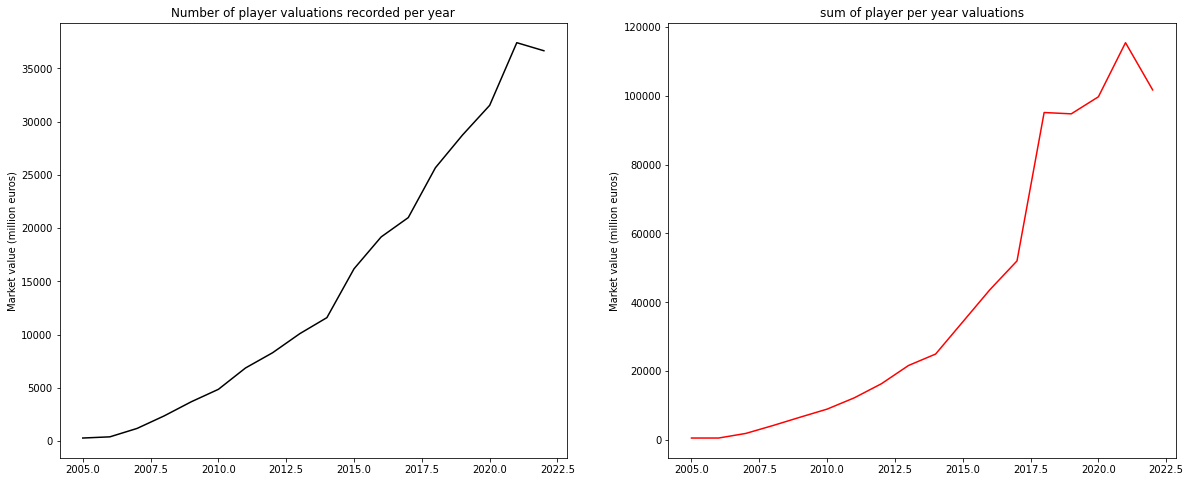

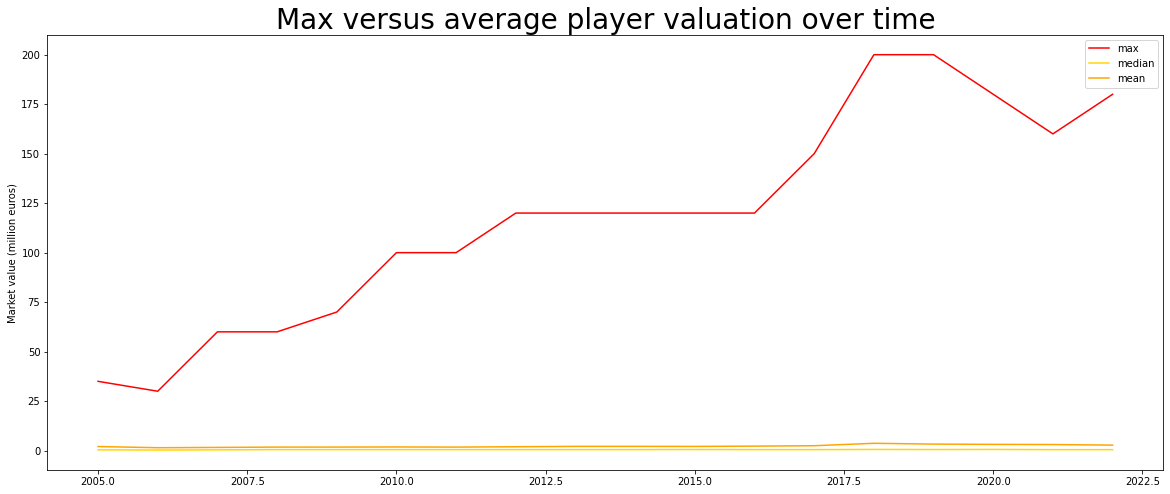

ValueError: num must be 1 <= num <= 4, not 5

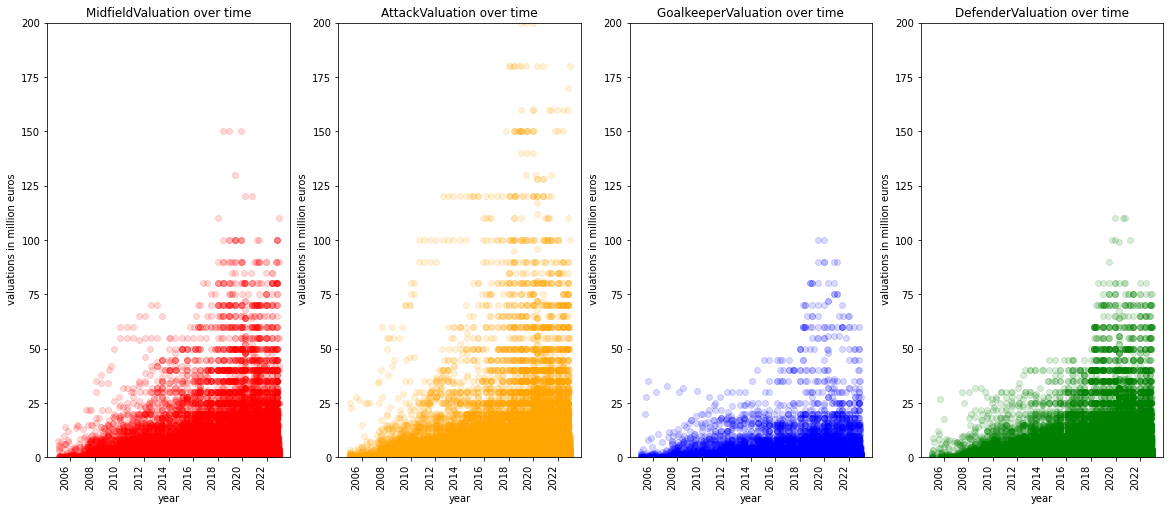

In [35]:
#filter range
player_valuations_df = player_valuations_df[(player_valuations_df.year > 2004 ) & (player_valuations_df.year < 2023 )]
high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000 )]
positions=players_df.position.unique()

# Lookat data
#print(player_valuations_df.columns)

# Visualize of valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='red',alpha=0.15)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

# Visualize of valuation data over time
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
yeargroups1 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).count() \
    .sort_values(by='year', ascending=True)
yeargroups2 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).sum() \
    .sort_values(by='year', ascending=True)
yeargroups3 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).max() \
    .sort_values(by='year', ascending=True)
yeargroups4 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).min() \
    .sort_values(by='year', ascending=True)
yeargroups5 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).median() \
    .sort_values(by='year', ascending=True)
yeargroups6 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).mean() \
    .sort_values(by='year', ascending=True)

plt.subplot(1, 2, 1)                 
plt.title('Number of player valuations recorded per year')
plt.plot(yeargroups1.index,yeargroups1,color='black')
plt.ylabel('Market value (million euros)')
plt.subplot(1, 2, 2)
plt.title('sum of player per year valuations')
plt.plot(yeargroups2.index,yeargroups2/1000000,color='red')
plt.ylabel('Market value (million euros)')
plt.show()
plt.figure(figsize=(20,8))
plt.title('Max versus average player valuation over time',fontsize=28)
plt.plot(yeargroups3.index,yeargroups3/1000000,color='r',label='max')
plt.plot(yeargroups5.index,yeargroups5/1000000,color='Gold',label='median')
plt.plot(yeargroups6.index,yeargroups6/1000000,color='Orange',label='mean')
plt.ylabel('Market value (million euros)')
plt.legend()
plt.show()

# valuation by position
plt.figure(figsize=(20,8))
n=1;colour=['yellow','r','orange','b','g']
for position in positions:
    plt.subplot(1,4,n);n=n+1
    player_valuations_df1 = player_valuations_df[(player_valuations_df.position==position)]                                             
    plt.scatter(player_valuations_df1['datetime'],y=player_valuations_df1['market_value_in_eur']/1000000, c=colour[n-1],alpha=0.15)
    plt.xlabel('year')
    plt.ylabel(' valuations in million euros')
    plt.title(position+'Valuation over time')
    plt.ylim(0,200)
    plt.xticks(rotation=90, ha='right')
plt.show()  


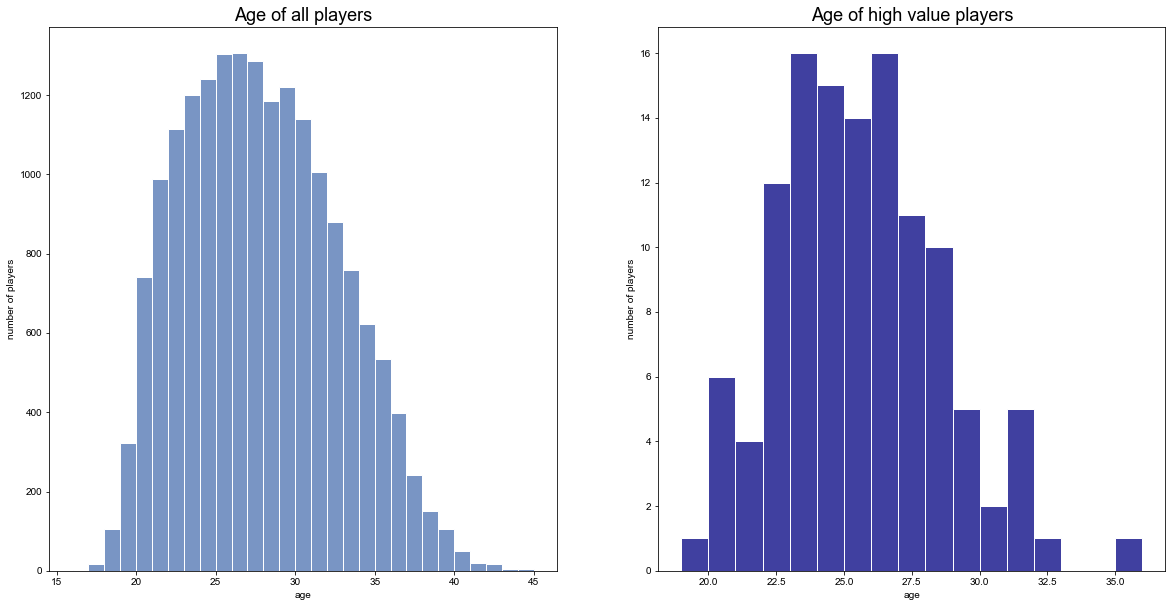

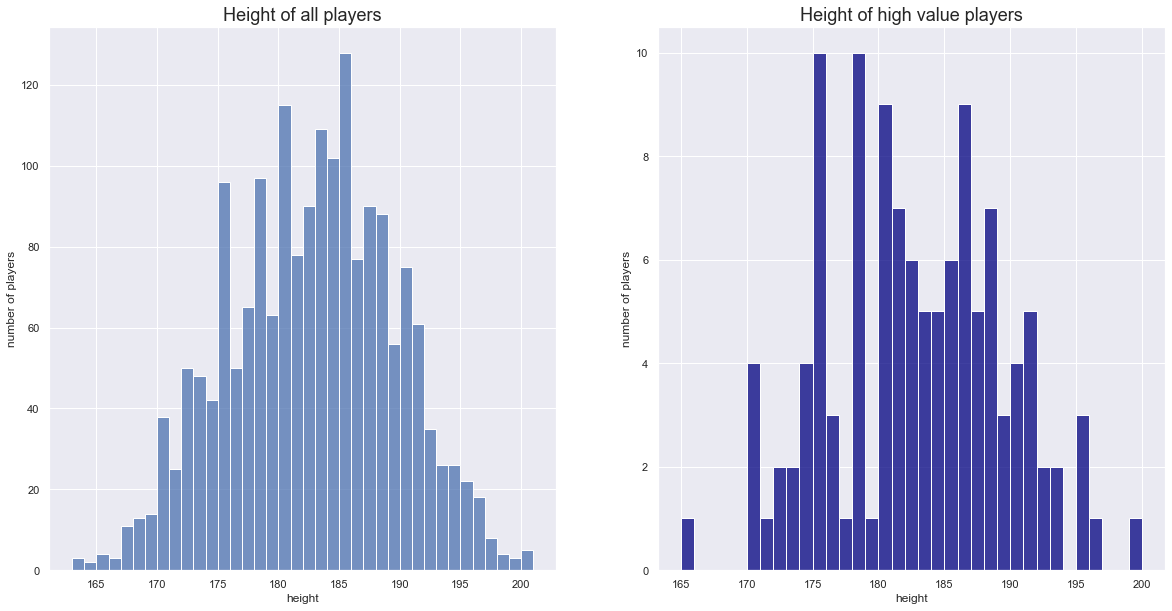

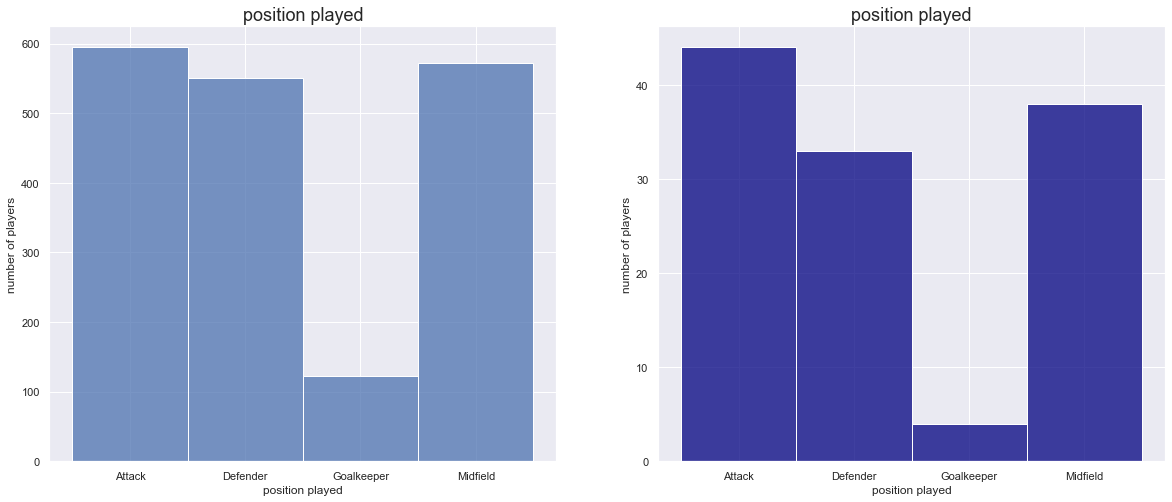

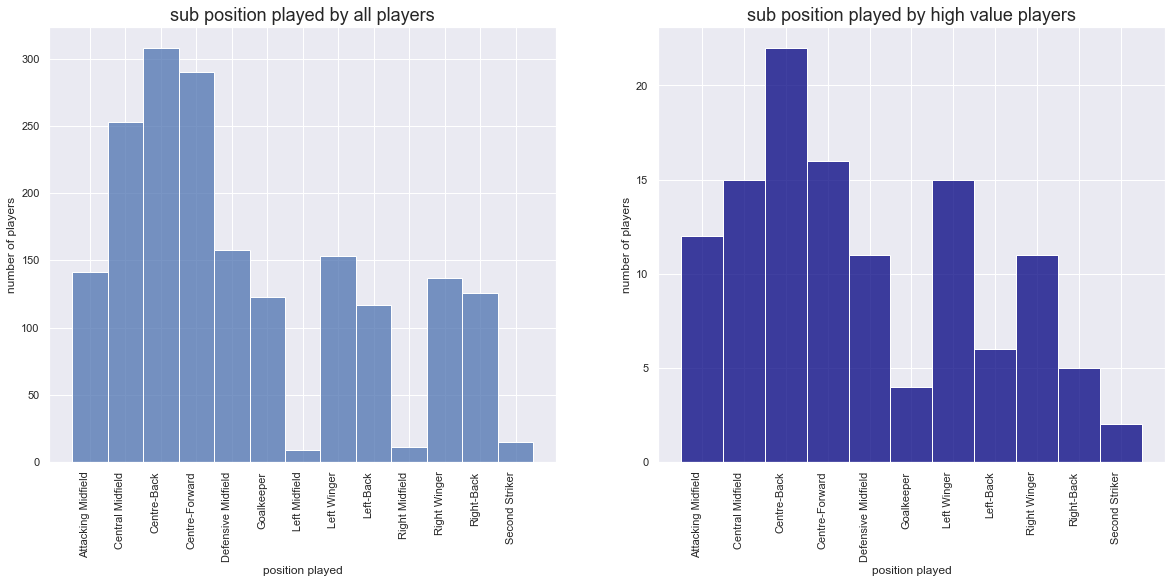

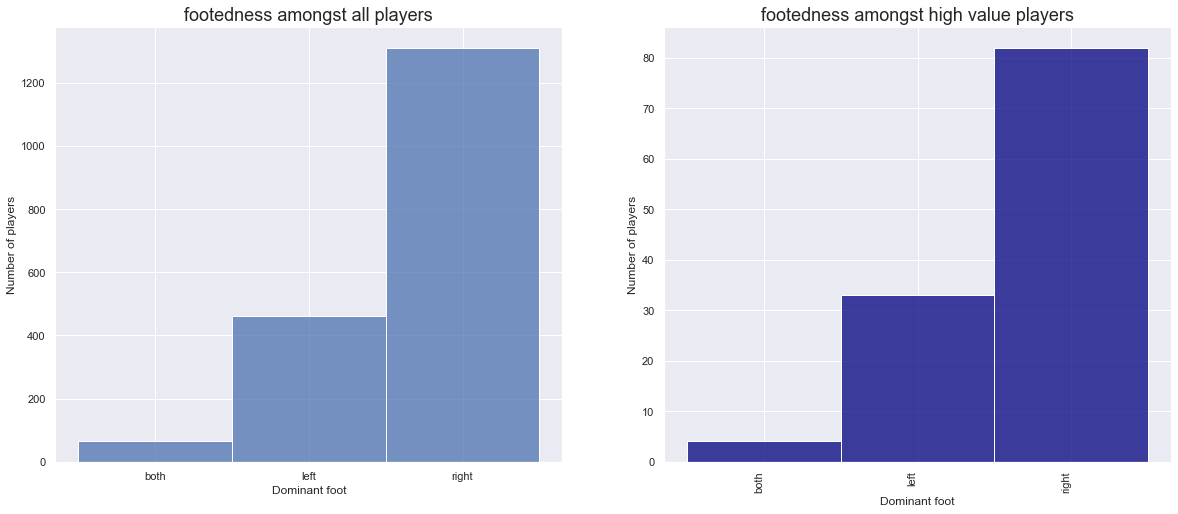

In [36]:
#overview of player dataset
#remove players with no Market Value
players_df1 = players_df[players_df.highest_market_value_in_eur.isnull() == False]
#order by Market Value
players_df1 = players_df1.sort_values("highest_market_value_in_eur", ascending = False)
#filter by season and value
players_df1 = players_df[players_df['last_season'] >= 2021]
players_df1 = players_df1[players_df1['highest_market_value_in_eur'] >= 10000000]
high_value_players_df = players_df1[(players_df1.market_value_in_eur > 40000000 )]
positions=players_df.position.unique()

# Show player age distribution
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='age',data=players_df, binwidth=1,color='b')
plt.title("Age of all players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Age of high value players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')

# Show player height distribution
players_df3 = players_df1[players_df1.height_in_cm.isnull() == False]
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='height_in_cm',data=players_df3, binwidth=1,color='b')
plt.title("Height of all players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='height_in_cm',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Height of high value players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')

# Show position data
players_df1 = players_df1.sort_values("position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
plt.title("position played",fontsize=18);plt.grid(True)
sns.histplot(x='position',data=players_df1, binwidth=1,color='b')
plt.xlabel('position played'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("position played",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')

# Show subposition data
players_df1 = players_df1.sort_values("sub_position", ascending = True)
high_value_players_df1 = high_value_players_df.sort_values("sub_position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='sub_position',data=players_df1, binwidth=1,color='b')
plt.title("sub position played by all players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.subplot(1, 2, 2)
sns.histplot(x='sub_position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("sub position played by high value players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');

# Show  footedness data
players_df1 = players_df1.sort_values("foot", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("foot", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='foot',data=players_df1, binwidth=1,color='b')
plt.title("footedness amongst all players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='foot',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("footedness amongst high value players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.xticks(rotation=90, ha='right');